# Домашнее задание 4 | Линейная и логистическая регрессия

**Общие моменты:**

* Обязательно гуглите всю необходимую информацию. Вы можете использовать прочие (которые не упоминались на занятиях) методы и алгоритмы для решения задач, но при условии, что Вы сможете их объяснить. Если Вы нашли какой-то интересный способ решения, то нужно в комментарий добавить ссылку на источник.

* Списывать/плагиатить строго запрещено. Можно использовать готовые решения из интернета только в случае, если Вы укажите ссылку на источник. И поясните, почему лучше так, а не каким-то стандартным (рекомендуемым) способом.

* Желательно (но не обязательно) указывать комментарии в Вашем решении. Это и Вам поможет понять, что Вы делаете. И также это поможет преверяющему в случае вопросов.

* Технологии типа ChatGPT не использовать.

* В случае каких-то вопросов или спорных ситуаций (например, после получения результатов дз), обращайтесь к ассистенту/преподавателю. И лучше пишите какие-то комментарии к своему коду, чтобы спорных ситуаций было как можно меньше.

* Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов (+ бонус). Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

* Сдавать ДЗ в SmartLMS!

**Успехов!**

## Данные:

Вам предлагается использовать в качестве датасета информацию о характеристиках бриллиантов.

Информация о наборе данных и загрузка: https://www.kaggle.com/datasets/shivam2503/diamonds (либо на GitHub в файле diamonds.csv)

Датасет содержит следующие атрибуты:

* price: цена бриллианта в долларах США
* carat: вес бриллианта в каратах 
* cut: разновидность огранки (Fair, Good, Very Good, Premium, Ideal)
* color: цвет бриллианта (J (хуже всего), I, H, G, F, E, D (лучше всего))
* clarity: показатель "чистоты" бриллианта (I1 (хуже всего), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (лучше всего))
* x: длина в мм
* y: ширина в мм
* z: глубина в мм
* depth: соотношение глубины и размера площадки бриллианта в сравнении с диаметром бриллианта, выраженное в процентах
* table: отношение ширины бриллианта в верхней точке к самой широкой точке

Будем решать **задачу прогнозирования цены бриллианта (price)**, основываясь на остальных приведенных в датасете характеристиках.

Прежде чем строить какие-либо модели, нам необходимо убедиться в качестве данных. Выбросы могут кардинально менять коэффициенты модели, ухудшая её качество и искажая результаты.

## Задание 1 (1 балл): загрузка данных и удаление выбросов

- загрузите данные (файл diamonds.csv)
- постройте график "ящик с усами" (boxplot) для переменных depth, x, y, z, carat. Есть ли выбросы?
- удалите из датафрейма строки, в которых содержатся выбросы по этим переменным (используйте критерий с интерквартальным размахом)
- проверьте получившийся датафрейм на пропущенные значения. Если в каком-то из столбцов есть пропущенное значение, удалите эти строки

In [1]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats 

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Дата сосайенс/diamonds.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


{'whiskers': [<matplotlib.lines.Line2D at 0x7fcec88217e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcec8821d20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcec88215d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcec8822260>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcec8822500>],
 'means': []}

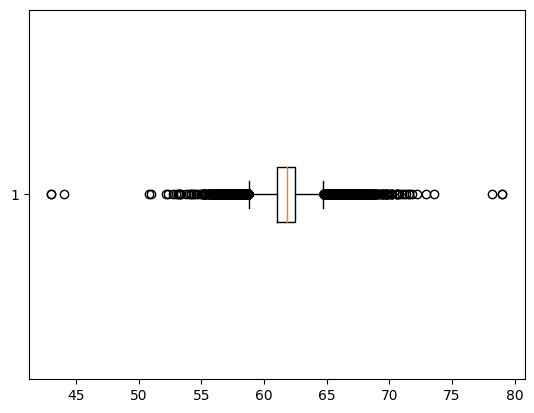

In [4]:
plt.boxplot(df['depth'], vert = False)

In [5]:
q1d = df['depth'].quantile(0.25)
q3d = df['depth'].quantile(0.75)
iqr_d = q3d-q1d
upprd = q3d + iqr_d*1.5
lowerd = q1d - iqr_d*1.5
data_wo_depth_outliers = df[(df['depth'] <= upprd) & (df['depth'] >= lowerd)] 
data_wo_depth_outliers.shape[0]

51395

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcec873e110>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcec873e650>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcec873de70>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcec873eb90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcec873ee30>],
 'means': []}

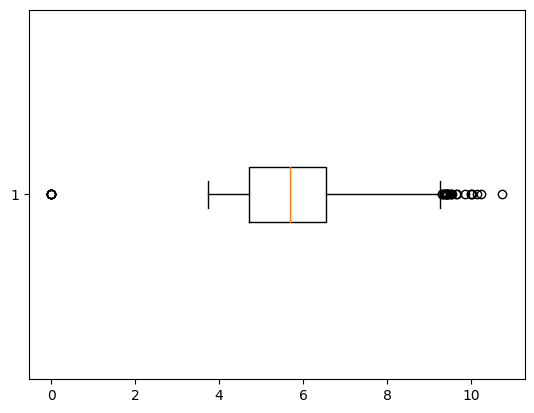

In [6]:
plt.boxplot(df['x'], vert = False)

In [7]:
q1x = data_wo_depth_outliers['x'].quantile(0.25)
q3x = data_wo_depth_outliers['x'].quantile(0.75)
iqr_x = q3x-q1x
upprx = q3x + iqr_x*1.5
lowerx = q1x - iqr_x*1.5
data_wo_depth_x_outliers = data_wo_depth_outliers[(data_wo_depth_outliers['x'] <= upprx) & (data_wo_depth_outliers['x'] >= lowerx)] 
data_wo_depth_x_outliers.shape[0]

51372

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcec878da50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcec87bc460>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcec878c910>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcec87bc9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcec87bcc40>],
 'means': []}

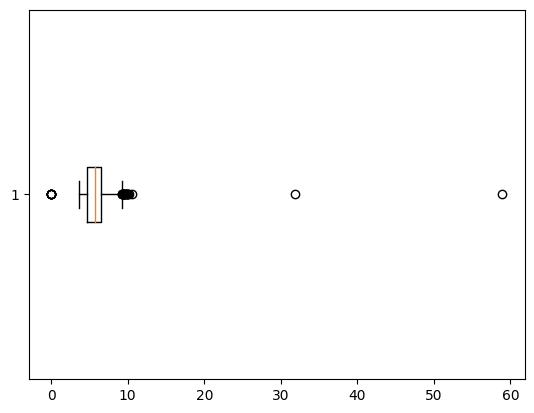

In [8]:
plt.boxplot(df['y'], vert = False)

In [9]:
q1y = data_wo_depth_x_outliers['y'].quantile(0.25)
q3y = data_wo_depth_x_outliers['y'].quantile(0.75)
iqr_y = q3y-q1y
uppry = q3y + iqr_y*1.5
lowery = q1y - iqr_y*1.5
data_wo_depth_x_y_outliers = data_wo_depth_x_outliers[(data_wo_depth_x_outliers['y'] <= uppry) & (data_wo_depth_x_outliers['y'] >= lowery)] 
data_wo_depth_x_y_outliers.shape[0]

51369

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcec6312770>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcec6344130>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcec6313a30>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcec6344670>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcec6344910>],
 'means': []}

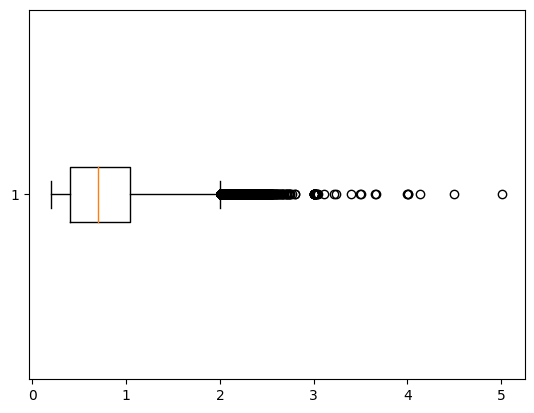

In [10]:
plt.boxplot(df['carat'], vert = False)

In [11]:
q1c = data_wo_depth_x_y_outliers['carat'].quantile(0.25)
q3c = data_wo_depth_x_y_outliers['carat'].quantile(0.75)
iqr_c = q3c-q1c
upprc = q3c + iqr_c*1.5
lowerc = q1c - iqr_c*1.5
data_wo_depth_x_y_carat_outliers = data_wo_depth_x_y_outliers[(data_wo_depth_x_y_outliers['carat'] <= upprc) & (data_wo_depth_x_y_outliers['carat'] >= lowerc)] 
data_wo_depth_x_y_carat_outliers.shape[0]

50066

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcec63929b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcec6392dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcec6392710>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcec6393310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcec63935b0>],
 'means': []}

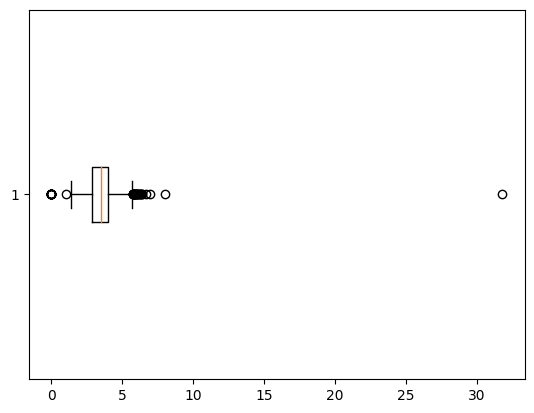

In [12]:
plt.boxplot(df['z'], vert = False)

In [13]:
q1z = data_wo_depth_x_y_carat_outliers['z'].quantile(0.25)
q3z = data_wo_depth_x_y_carat_outliers['z'].quantile(0.75)
iqr_z = q3z-q1z
upprz = q3z + iqr_z*1.5
lowerz = q1z - iqr_z*1.5
data_wo_depth_x_y_carat_z_outliers = data_wo_depth_x_y_carat_outliers[(data_wo_depth_x_y_carat_outliers['z'] <= upprz) & (data_wo_depth_x_y_carat_outliers['z'] >= lowerz)] 
data_wo_depth_x_y_carat_z_outliers.shape[0]

50058

Если вы всё сделали верно, в вашем датафрейме должно было остаться около 49666 объектов. Удостоверьтесь в этом, используя атрибут `.shape`

In [14]:
final_data = data_wo_depth_x_y_carat_z_outliers.dropna()
final_data.shape[0] #че-то не знаю,  как должно было получиться 4966

50058

## Задание 2 (1 балл): исследуем предпосылки к применению линейной модели

Как известно, перед построением линейной модели мы хотим знать, есть ли к этому предпосылки в наших данных. Более конкретно, мы хотим проверить два свойства: 
- отсутствие мультиколлинеарности (зависимые переменные коррелируют с прогнозируемой, но не между собой)
- линейная зависимость прогнозируемой переменной от регрессоров (в нашем случае — переменной price от depth, x, y, z)

Постройте тепловую карту и парные графики рассеяния для переменных price, depth, x, y, z (подсказка: используйте `sns.heatmap` и `sns.pairplot`). Проанализируйте полученные графики:
- есть ли линейная связь между ценой и какими-либо регрессорами? 
- есть ли мультиколлинеарность между регрессорами?

In [15]:
df1 = pd.DataFrame()
df1['price'] = final_data['price']
df1['x'] = final_data['x']
df1['y'] = final_data['y']
df1['z'] = final_data['z']
df1['depth'] = final_data['depth']
df1

,price,x,y,z,depth
0,326,3.95,3.98,2.43,61.5
1,326,3.89,3.84,2.31,59.8
3,334,4.20,4.23,2.63,62.4
4,335,4.34,4.35,2.75,63.3
5,336,3.94,3.96,2.48,62.8
...,...,...,...,...,...
53935,2757,5.75,5.76,3.50,60.8
53936,2757,5.69,5.75,3.61,63.1
53937,2757,5.66,5.68,3.56,62.8
53938,2757,6.15,6.12,3.74,61.0


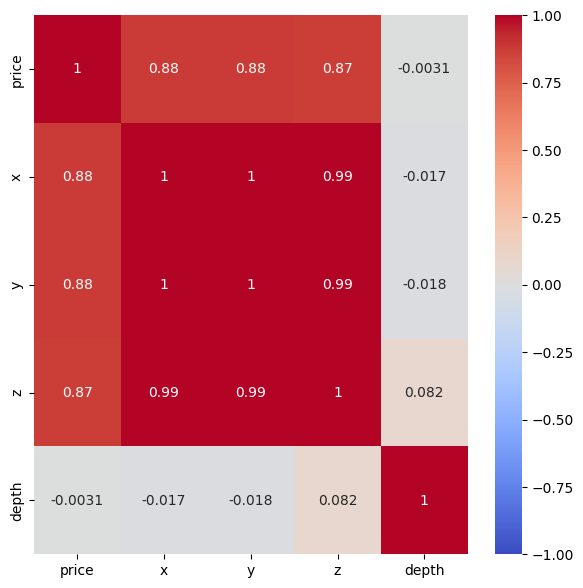

In [16]:
plt.figure(figsize=(7, 7))
# Размеры бриллианта (x, y, z) сильно коррелируют между собой, что может указывать на мультиколлинеарность. 
# Глубина (depth) не коррелирует с другими регрессорами, что хорошо. 
# Таким образом, мы можем использовать все регрессоры в модели, кроме, возможно, одного из размеров бриллианта (например, только x). 
# Также можно рассмотреть идею создания новой переменной, которая будет учитывать размеры бриллианта в целом (например, объем).
p = sns.heatmap(df1.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

In [17]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Источник: https://www.codecamp.ru/blog/multiple-linear-regression-assumptions/
#find design matrix for linear regression model using 'price' as response variable 
y, X = dmatrices('price ~ z+x+y+depth', data=df1, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif 
#VIF должен быть не больше 5 
# Значение больше 5 указывает на потенциально сильную корреляцию между данной независимой переменной и другими независимыми переменными в модели. 
# В этом случае оценки коэффициентов и p-значения в выходных данных регрессии, вероятно, ненадежны. Мультиколлинеарность здесь есть.
# Помимо depth, но depth никак не коррелирует с price, что мы увидим дальше

,VIF,variable
0,21002.705573,Intercept
1,583.549170,z
2,521.803461,x
3,519.740742,y
4,6.816712,depth


<Figure size 1000x1000 with 0 Axes>

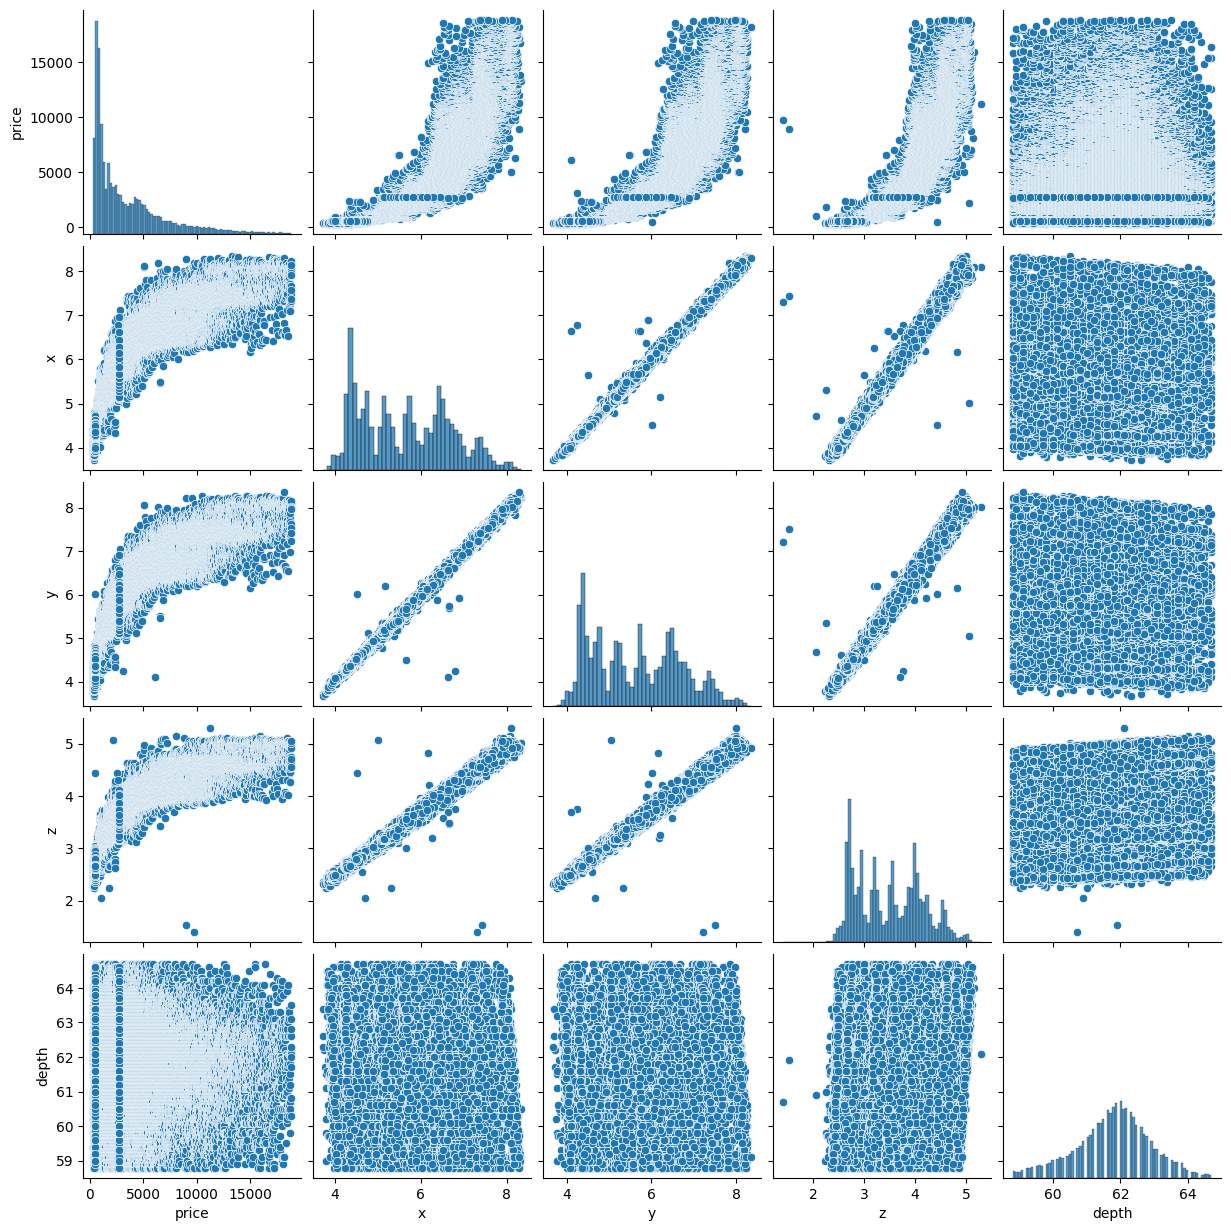

In [18]:
plt.figure(figsize=(10, 10))
sns.pairplot(df1) # Цена (price) имеет положительную линейную связь с размером бриллианта (x, y, z). Чем больше размер, тем выше цена.
# Цена не имеет явной линейной связи с глубиной (depth). 

## Задание 3 (1 балл): одномерная линейная регрессия 

Используя графики выше, выберите один регрессор, который, как вам кажется, наиболее хорошо кореллирует с целевой переменной, и постройте (обучите) модель линейной регрессии для прогнозирования цены бриллианта по этому регрессору. 

Вы можете использовать любую угодную Вам библиотеку

Проинтерпретируйте полученный коэффициент. Например: при изменении данного регрессора на Х целевая переменная изменится на Y

In [19]:
X = df1['y'] # цена лучше всего коррелирована с y и x, давайте возьмем y как регрессор
y = df1['price']
result = scipy.stats.linregress(X, y)
result # получаем уравнение y = -13392.269983745773 + 3012.699209711425*x
# При изменении данного регрессора 'y' на 1 единицу, целевая перменная изменится на 3012.699209711425. Однако, необходимо учитывать, 
# что такая модель может быть недостаточно точной, так как цена бриллианта зависит не только от его ширины, но и от других факторов, 
# таких как прозрачность, цвет и качество огранки.

LinregressResult(slope=3012.699209711425, intercept=-13392.269983745773, rvalue=0.8785979264986478, pvalue=0.0, stderr=7.319265482717822, intercept_stderr=41.98473540871031)

Предположим, у нас есть некоторый бриллиант со следующими характеристиками: 

- carat = 0.90
- depth = 62.7
- table = 60
- x = 6.12
- y = 6.07
- z = 3.82

Какую цену на данный бриллиант можно спрогнозировать, используя полученную модель? 

In [20]:
y = -13392.269983745773 + 3012.699209711425*6.07
y
# Таким образом, модель предсказывает цены бриллиантов в зависимости от их ширины.

4894.814219202577

In [21]:
#проверочка
import statsmodels.formula.api as smf
lm = smf.ols(formula='price ~ y', data = df1).fit()
lm.params

Intercept   -13392.269984
y             3012.699210
dtype: float64

С другим регрессором — если посчитать из трех метрик объем алмаза как параллелепипеда (это допущение, тк алмазы оч разной формы бывают):

In [22]:
df1['volume'] = df['x']*df['y']*df['z'] #x,y,z очень коррелированные между собой штуки, поэтому посчитаю одномерную линейную регрессию от объема,
# предполагая, что будет лучше качество модели (тк они все еще и коррелируют с price, что достаточно логично)
df1

,price,x,y,z,depth,volume
0,326,3.95,3.98,2.43,61.5,38.202030
1,326,3.89,3.84,2.31,59.8,34.505856
3,334,4.20,4.23,2.63,62.4,46.724580
4,335,4.34,4.35,2.75,63.3,51.917250
5,336,3.94,3.96,2.48,62.8,38.693952
...,...,...,...,...,...,...
53935,2757,5.75,5.76,3.50,60.8,115.920000
53936,2757,5.69,5.75,3.61,63.1,118.110175
53937,2757,5.66,5.68,3.56,62.8,114.449728
53938,2757,6.15,6.12,3.74,61.0,140.766120


In [23]:
X_vol = df1['volume']
y_vol = df1['price']
res = scipy.stats.linregress(X_vol, y_vol)
res # получаем уравнение y = -2355.6550910668393 + 48.7221567841667*x

LinregressResult(slope=48.72215678416675, intercept=-2355.6550910668393, rvalue=0.9150975093076132, pvalue=0.0, stderr=0.09595922279968802, intercept_stderr=13.378609389429723)

In [24]:
#проверка
import statsmodels.formula.api as smf
lm_vol = smf.ols(formula='price ~ volume', data = df1).fit()
lm_vol.params

Intercept   -2355.655091
volume         48.722157
dtype: float64

In [25]:
# При изменении данного регрессора 'volume' на 1 единицу, целевая перменная изменится на 48.722157. Однако, необходимо учитывать, 
# что такая модель может быть недостаточно точной, так как цена бриллианта зависит не только от его объема, но и от других факторов, 
# таких как прозрачность, цвет и качество огранки.

In [26]:
y_vol = -2355.6550910668393 + 48.7221567841667*(6.12*6.07*3.82)
y_vol
# Таким образом, модель предсказывает цены бриллиантов в зависимости от их объема.

4558.354554822346

In [27]:
#проверо4ка 
X_new = pd.DataFrame({'volume': [6.12*6.07*3.82]})
X_new.head()

lm_vol.predict(X_new)

0    4558.354555
dtype: float64

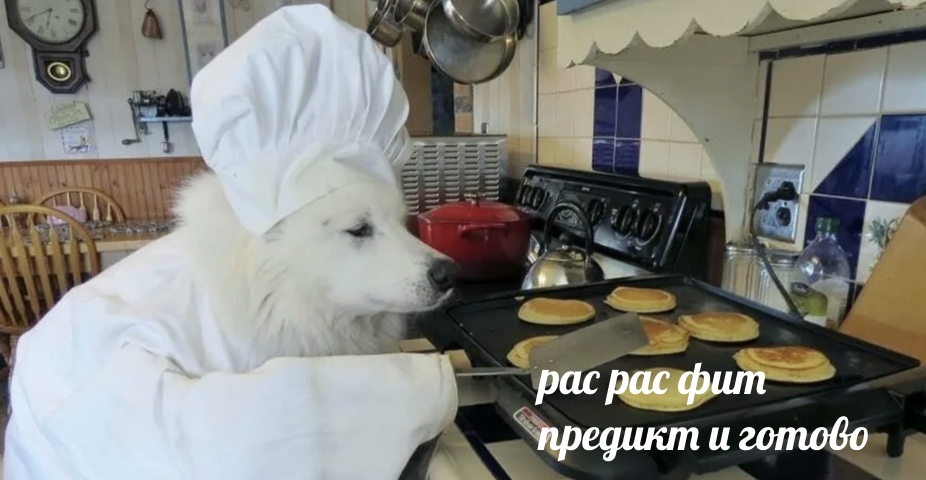

## Задание 4 (1 балл): оценка качества модели

Теперь оценим качество получившейся модели на нашем датасете.

- посчитайте коэффициент $R^2$. Каким образом его можно проинтерпретировать? Что можно сказать о качестве получившегося прогноза?
- Выберите еще одну метрику для оценки качества модели регрессии и посчитайте её (например, MSE, MAE, RMSE, MAPE)

In [28]:
# для регрессора y
result_sq = result.rvalue ** 2
print(result_sq)
# Модель объясняет зависимость и изменения изучаемого параметра price от исследуемого фактора y (ширина) на 77%, это достаточно хороший результат

0.7719343164477233


In [29]:
# MSE ищем. По одной MSE ничего сравнить нельзя, но очевидно, что с одним предиктором предсказывает она неидеально
MSE = ((df1["price"] - lm.predict(df1['y']))**2).sum()/df1.shape[0]
MSE

2896501.2311212956

In [30]:
# MAE ищу просто так, чтобы прикинуть, насколько реалистично 3 млн MSE)
MAE = ((df1["price"] - lm.predict(df1["y"]))).sum()/df1.shape[0]
MAE

-6.9768261912342574e-15

Для регрессора volume:

In [31]:
r_sq = res.rvalue ** 2
print(r_sq)
# Модель объясняет зависимость и изменения изучаемого параметра price от исследуемого фактора volume на 83%, это достаточно хороший результат,
# чуть лучше предыдущей модели

0.8374034515409973


In [32]:
# MSE ищем. И она оказалась лучше (меньше), чем у модели, которая изменения price объясняет через изменения y
MSE = ((df1["price"] - lm_vol.predict(df1["volume"]))**2).sum()/df1.shape[0]
MSE

2065023.9678852009

In [33]:
# MAE тоже оказалась меньше -> лучше. Итого: модель с предиктором volume лучше предсказывает изменения цены, чем с предиктором y
MAE = (abs((df1["price"] - lm_vol.predict(df1["volume"])))).sum()/df1.shape[0]
MAE

952.0850775751395

## Задание 5 (1 балл): визуализация прогнозов модели

Поскольку модель у нас линейная и пока что зависит всего от одного регрессора, мы можем построить график с фактической и прогнозируемой ценой бриллианта! Давайте сделаем это. 

По оси X отложите выбранный Вами регрессоор, по оси Y — цену бриллианта. Каждый объект выборки отметьте на этом графике точкой (=постройте диаграмму рассеяния), а также на тот же график нанесите линию с прогнозом модели. 

Для регрессора Y

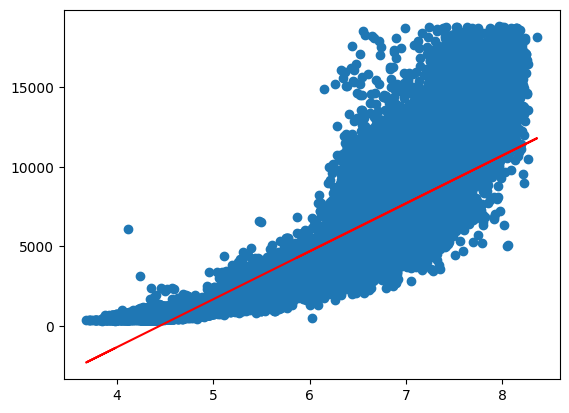

In [34]:
import matplotlib.pyplot as plt
w0 = lm.params.Intercept 
w1 = lm.params.y 

plt.scatter(df1['y'], df1['price'])
plt.plot(df1['y'], w1*df1['y']+w0, color = 'r')

Для регрессора Volume

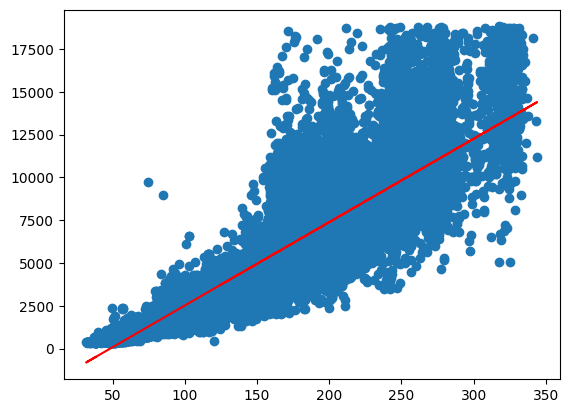

In [35]:
import matplotlib.pyplot as plt
w0 = lm_vol.params.Intercept # -2355.655091
w1 = lm_vol.params.volume # 48.722157

plt.scatter(df1['volume'], df1['price'])
plt.plot(df1['volume'], w1*df1['volume']+w0, color = 'r')

## Задание 6 (2 балла): множественная линейная регрессия 

- Постройте новую модель, на этот раз в качестве регрессоров используйте все переменные из задания №2. 
- Посчитайте качество нашей модели (коэффициент детерминации $R^2$). Как изменилось качество? Стала ли новая модель лучше или хуже? 
- Взгляните на получившиеся коэффициенты. Как поменялся коэффициент при регрессоре из задания №3? 
- Сделайте новой моделью прогноз стоимости для бриллианта из задания №3. Как поменялся прогноз? 

Чтобы смочь сделать пункт 6.3, сравнивать буду с одномерной моделью с регрессором 'y'

In [36]:
#  создаём модель по формуле
lm_mn = smf.ols(formula='price ~ x + y + z + depth', 
             data=df1).fit()

# и выводим коэффициенты
lm_mn.params

Intercept   -16268.084780
x             -228.232155
y             3286.029871
z              -69.808912
depth           46.353506
dtype: float64

In [37]:
# выведем саммари по полученной модели
lm_mn.summary() #r^2 = 0,77, это значит, что модель объясняет 77% изменений в данных, это достаточно неплохо, модель не стала значительно лучше/хуже
# стоит отметить, что не все коэффы значимы — например, не значимы даже при самом большом уровне значимости 0.1 буду коэффы перед x, z

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                 4.240e+04
Date:                Tue, 30 May 2023   Prob (F-statistic):               0.00
Time:                        13:42:55   Log-Likelihood:            -4.4342e+05
No. Observations:               50058   AIC:                         8.868e+05
Df Residuals:                   50053   BIC:                         8.869e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.627e+04   1102.000    -14.762      0.000   -1.84e+04   -1.41e+04
x           -228.2322    166.133     -1.374      0.170    -553.854      97.390
y           3286.0299    166.800     19.700      0.000    2959.100    3612.960
z            -69.8089    284.352     -0.246      0.806    -627.142     487.524
depth         46.3535     17.828      2.600      0.009      11.410      81.297
==============================================================================
Omnibus:                    16590.582   Durbin-Watson:                   0.330
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            71057.016
Skew:                           1.587   Prob(JB):                         0.00
Kurtosis:                       7.898   Cond. No.                     9.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Условие для расчета цена из задания по одномерной модели: 

- carat = 0.90
- depth = 62.7
- table = 60
- x = 6.12
- y = 6.07
- z = 3.82


In [38]:
# цена была предсказана 4894.814219202577 в регрессии с предиктором y
# множ.регрессия от всех предикторов из п.2: y =  -16268.084780 + -228.232155*x + 3286.029871*y -69.808912*z + 46.353506*depth
# теперь перед y у нас коэффициент 3286.029871, в одномерной регрессии был 3012.699209711425. коэфф вырос
y_mn =  -16268.084780 + -228.232155*6.12 + 3286.029871*6.07 -69.808912*3.82 + 46.353506*62.7
y_mn
# изменения в прогнозе стоимости: прогноз незначительно возрос

4921.030530730002

## БОНУС! (1 балл): категориальные переменные

До этого мы намеренно выбрали из нашего датафрейма только числовые переменные. На практике часто какая-либо информация содержится в категориальных переменных, и их, разумеется, тоже хочется учитывать, когда мы делаем прогноз. 

Самостоятельно изучите один из способов кодирования категориальных переменных. Например, One-Hot Encoding, Mean Target Encoding, Ordinal Encoding (применим ли этот способ в данном случае? Взгляните на описание категориальных переменных). 

Реализуйте этот способ и обучите новую модель, на этот раз добавив туда ещё и закодированные категориальные переменные. 

- как изменилось качество модели? 
- какой вклад вносят категориальные переменные? Проинтерпретируйте коэффициенты при них

In [39]:
! pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.8 MB/s eta 0:00:00


In [40]:
# к категориальным относим:
# cut: разновидность огранки (Fair, Good, Very Good, Premium, Ideal)
#color: цвет бриллианта (J (хуже всего), I, H, G, F, E, D (лучше всего))
#clarity: показатель "чистоты" бриллианта (I1 (хуже всего), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (лучше всего))

import category_encoders as ce
encoder = ce.OrdinalEncoder(cols = ['cut'],
                           return_df = True,
                           mapping = [
                           {'col':'cut', 
                           'mapping':{'Fair':0,'Good':1,'Very Good':2,
                           'Premium':3, 'Ideal':4}}
                           ])
final_data['transformed_cut'] = encoder.fit_transform(final_data['cut'])

encoder1 = ce.OrdinalEncoder(cols = ['color'],
                           return_df = True,
                           mapping = [
                           {'col':'color', 
                           'mapping':{'J':0,'I':1,'H':2,
                           'G':3, 'F':4, 'E':5, 'D':6}}
                           ])
final_data['transformed_color'] = encoder1.fit_transform(final_data['color'])


encoder2 = ce.OrdinalEncoder(cols = ['clarity'],
                           return_df = True,
                           mapping = [
                           {'col':'clarity', 
                           'mapping':{'I1':0,'SI2':1,'SI1':2,
                           'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7}}
                           ])
final_data['transformed_clarity'] = encoder2.fit_transform(final_data['clarity'])
df_encoded = final_data
df_encoded

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,transformed_cut,transformed_color,transformed_clarity
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,4,5,1
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,5,2
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,1,3
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0,1
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,4,6,2
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,1,6,2
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,2,6,2
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,3,2,1


In [41]:
#  создаём модель по формуле
lm_new = smf.ols(formula='price ~ x + y + z + depth + transformed_cut	+ transformed_color	+ transformed_clarity', 
             data=final_data).fit()

# и выводим коэффициенты
lm_new.params
# все категориальные переменные влияют на цену алмаза положительно — то есть чем выше значtния катю переменных, тем выше цена
# transformed_cut           67.939556 при изменении transformed_cut на 1 порядок цена алмаза вырастает на 67.939556
#transformed_color         268.541879 при изменении transformed_color на 1 порядок цена алмаза вырастает на 268.54187
# transformed_clarity      534.707330 при изменении transformed_clarity на 1 порядок цена алмаза вырастает на 534.707330

Intercept             -27890.842984
x                       1522.010267
y                       2119.015848
z                       -391.836846
depth                    154.127031
transformed_cut           67.939556
transformed_color        268.541879
transformed_clarity      534.707330
dtype: float64

In [42]:
lm_new.summary() #r^2 выросло по сравнению с множ лин регрессией с только числовыми переменными,
# теперь моделью объясняются 83% всей изменений признака price. причем все коэффы, кроме z, значимы на уровне значимости 0.1 и меньше (0.05, 0.01)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                 3.570e+04
Date:                Tue, 30 May 2023   Prob (F-statistic):               0.00
Time:                        13:43:00   Log-Likelihood:            -4.3562e+05
No. Observations:               50058   AIC:                         8.712e+05
Df Residuals:                   50050   BIC:                         8.713e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -2.789e+04    953.678    -29.246      0.000   -2.98e+04    -2.6e+04
x                    1522.0103    143.200     10.629      0.000    1241.337    1802.683
y                    2119.0158    143.521     14.765      0.000    1837.714    2400.318
z                    -391.8368    243.347     -1.610      0.107    -868.799      85.125
depth                 154.1270     15.352     10.039      0.000     124.036     184.218
transformed_cut        67.9396      6.642     10.229      0.000      54.921      80.958
transformed_color     268.5419      4.023     66.755      0.000     260.657     276.427
transformed_clarity   534.7073      4.338    123.270      0.000     526.205     543.209
==============================================================================
Omnibus:                    15845.223   Durbin-Watson:                   0.199
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57324.132
Skew:                           1.575   Prob(JB):                         0.00
Kurtosis:                       7.190   Cond. No.                     9.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Логистическая регрессия

Часто мы хотим строить модели не только для непрерывных переменных, но и номинальных. Для этого используется логистическая регрессия. 

Давайте немного поменяем постановку нашей задачи: предположим, мы знаем все характеристики бриллианта, кроме его огранки. И по этим характеристикам мы хотим ответить на вопрос: является ли огранка (колонка cut) идеальной или нет (идеальная огранка — это значение "Ideal" в колонке "cut")

## Задание 7 (0.5 балла): подготовка данных для логрегрессии

В данном случае мы будем решать задачу бинарной классификации: является ли огранка "идеальной"?

Для этого нам прежде всего нужно создать новую объясняемую переменную. Добавьте в датафрейм новую колонку target, получив её из колонки cut:
- если cut = "Ideal", то target = 1
- иначе, target = -1

После этого оставьте в датафрейме только следующие колонки: 
- target 
- price
- carat
- depth
- table

In [43]:
final_data['target'] = df['cut'].apply(lambda x: 1 if x == 'Ideal' else -1)

In [44]:
final_data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,transformed_cut,transformed_color,transformed_clarity,target
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,4,5,1,1
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,5,2,-1
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,1,3,-1
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0,1,-1
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,2,0,5,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,4,6,2,1
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,1,6,2,-1
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,2,6,2,-1
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,3,2,1,-1


In [45]:
# - target  - price - carat - depth - table
df2 = pd.DataFrame()
df2['target'] = final_data['target']
df2['price'] = final_data['price']
df2['carat'] = final_data['carat']
df2['depth'] = final_data['depth']
df2['table'] = final_data['table']
df2

,target,price,carat,depth,table
0,1,326,0.23,61.5,55.0
1,-1,326,0.21,59.8,61.0
3,-1,334,0.29,62.4,58.0
4,-1,335,0.31,63.3,58.0
5,-1,336,0.24,62.8,57.0
...,...,...,...,...,...
53935,1,2757,0.72,60.8,57.0
53936,-1,2757,0.72,63.1,55.0
53937,-1,2757,0.70,62.8,60.0
53938,-1,2757,0.86,61.0,58.0


In [46]:
X = pd.DataFrame(df2, columns = ['price', 'carat', 'depth', 'table'])
y = df2['target']
X

,price,carat,depth,table
0,326,0.23,61.5,55.0
1,326,0.21,59.8,61.0
3,334,0.29,62.4,58.0
4,335,0.31,63.3,58.0
5,336,0.24,62.8,57.0
...,...,...,...,...
53935,2757,0.72,60.8,57.0
53936,2757,0.72,63.1,55.0
53937,2757,0.70,62.8,60.0
53938,2757,0.86,61.0,58.0


Также в задачах машинного обучения часто обучение (подборка коэффициентов модели) и оценка качества делаются на разных датасетах, называемых, соответственно, тренировочной и тестовой выборками. 

Связано это с тем, что обычно качество хочется проверить на "новых" объектах, не участвовавших в подборке коэффициентов. 

Изучите функцию train_test_split из библиотеки sklearn и поделите датасет на тренировочную и тестовую выборку так, чтобы train:test=3:1

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, train_size=0.75)
print(X_train)
print(y_train.shape[0])
print(X_test)
print(y_test.shape[0])

       price  carat  depth  table
16898   6745   1.00   59.6   60.0
47104   1827   0.51   61.6   56.0
8227    4372   1.00   61.6   59.0
14892   5997   1.22   62.4   58.0
33774    841   0.41   62.6   57.0
...      ...    ...    ...    ...
28033    658   0.30   61.7   55.0
31984    776   0.30   62.8   55.0
23508  11518   1.06   62.7   58.0
14059    605   0.30   61.1   56.0
467     2818   0.80   61.0   57.0

[37543 rows x 4 columns]
37543
       price  carat  depth  table
22111  10138   1.24   61.5   54.0
13643   5584   1.37   63.0   57.0
51582   2393   0.73   59.5   58.0
18260   7416   1.21   63.1   60.0
47609   1880   0.64   61.7   55.0
...      ...    ...    ...    ...
42641   1332   0.50   61.5   55.0
10720    593   0.31   62.7   59.0
513     2823   0.61   61.3   54.0
2306    3164   0.73   61.4   55.0
39642   1085   0.40   62.0   56.0

[12515 rows x 4 columns]
12515


## Задание 8 (1 балл): построение логистической регрессии

Обучите на вашей тренировочной выборке логистическую регрессию. Выведите на экран коэффициенты и проинтерпретируйте их: каким образом каждая из переменных влияет на вероятность того, что у бриллианта идеальная огранка? 

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lr = LogisticRegression(max_iter=10000)

res = lr.fit(X_train, y_train)
print(res.coef_, res.intercept_)
# price    -0.000019  при изменении цены на 1 единицу "вероятность" наличия у алмаза идеальной огранки падает на 0.000019 
# carat    -0.0217    при изменении значения carat на 1 единицу "вероятность" наличия у алмаза идеальной огранки падает на 0.0217 
# depth     0.428     при изменении значения depth на 1 единицу "вероятность" наличия у алмаза идеальной огранки растет на 0.428
# table    -0.468     при изменении значения table на 1 единицу "вероятность" наличия у алмаза идеальной огранки падает на 0.468
# intercept нельзя интерпретировать, тк цена не может быть = 0, в целом так же как и другие величины, наверное

[[ 1.97423853e-04 -2.12194940e+00  4.22254848e-01 -4.58497391e-01]] [0.59968664]


## Задание 9 (1.5 балла): метрики логистической регрессии

На **тестовой** выборке:

- посчитайте accuracy (долю верных ответов) вашей модели. Правда ли, что ваша модель лучше, чем констнатный классификатор (отвечающий всегда "да" или всегда "нет")?

- Постройте ROC-кривую для вашей модели, а также посчитайте ROC-AUC. Правда ли, что ваша модель лучше, чем модель, выдающая случайный ответ (имеющая ROC-AUC=0.5). Не забудьте, что для расчета ROC AUC вам нужны прогнозы вероятностей, а не классов!

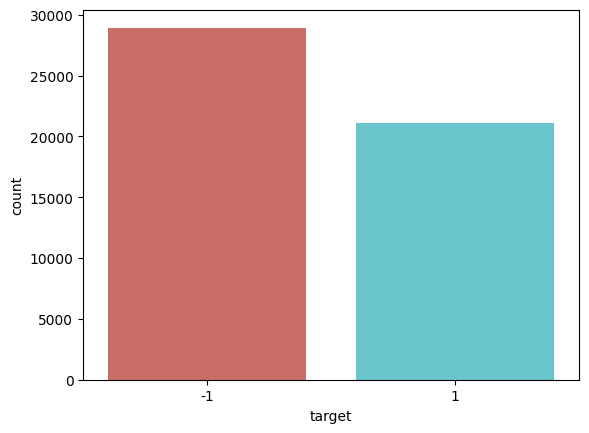

In [50]:
#Посмотрим, можем ли мы в случае с нашим датасетом с ирисами использовать accuracy.
#Давайте для начала посмотрим на баланс в наших данных -  сколько в них объектов класса 1, а сколько -1
import seaborn as sns

sns.countplot(x='target',data=df2, palette='hls')
plt.show()

In [51]:
from sklearn.metrics import accuracy_score

print('Accuracy на тесте:', accuracy_score(y_test, lr.predict(X_test)))
# Дизбаланс классов есть

Accuracy на тесте: 0.7176188573711546


In [52]:
 df2['Constant_model_cut'] = 1
 df2

,target,price,carat,depth,table,Constant_model_cut
0,1,326,0.23,61.5,55.0,1
1,-1,326,0.21,59.8,61.0,1
3,-1,334,0.29,62.4,58.0,1
4,-1,335,0.31,63.3,58.0,1
5,-1,336,0.24,62.8,57.0,1
...,...,...,...,...,...,...
53935,1,2757,0.72,60.8,57.0,1
53936,-1,2757,0.72,63.1,55.0,1
53937,-1,2757,0.70,62.8,60.0,1
53938,-1,2757,0.86,61.0,58.0,1


In [53]:
print('Accuracy на тесте:', accuracy_score(y_test, df2['Constant_model_cut'].iloc[:12515]))
# Моя модель лучше константного классификатора, отвечающего всегда да

Accuracy на тесте: 0.422532960447463


In [54]:
print('Accuracy на тесте:', accuracy_score(y_test, -1*(df2['Constant_model_cut'].iloc[:12515])))
# Моя модель лучше константного классификатора, отвечающего всегда нет!

Accuracy на тесте: 0.577467039552537


In [55]:
from sklearn.metrics import roc_curve
# считаем fpr и tpr, чтобы дальше построить по ним график
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])

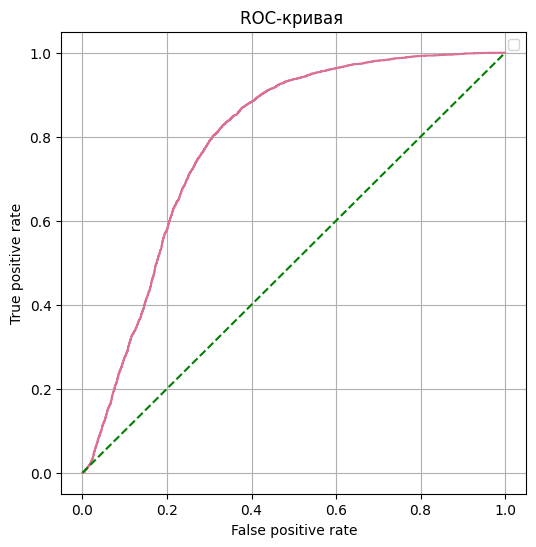

In [56]:
plt.figure(figsize=(6, 6))

plt.title('ROC-кривая ')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.plot(fpr, tpr, color='palevioletred')
plt.plot([0, 1], [0, 1], linestyle='--', color='green')
plt.legend()

plt.grid()
plt.show()

In [57]:
from sklearn.metrics import roc_auc_score

In [58]:
print('ROC-AUC на тесте:', roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))
# Вышло неплохо, учитывая, что значение ROC-AUC = 0.5, это то, что дает случайное предсказание, а значение = 1 у идеальной модели. Даже ближе к единице.
# Выходит, эта модель лучше модели, выдающей случайный результат и имеющей ROC-AUC = 0.5

ROC-AUC на тесте: 0.7897055309483034


In [59]:
from sklearn.metrics import confusion_matrix
from itertools import product

Confusion matrix, without normalization
[[5681 1546]
 [1988 3300]]


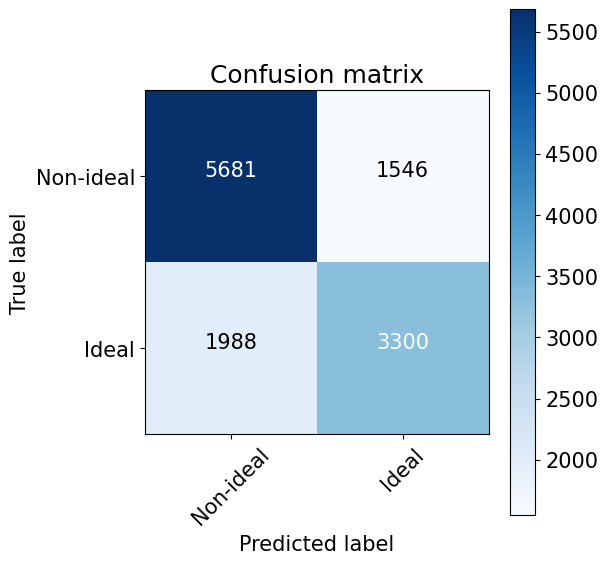

In [60]:
# а еще я решила почитать хабр и вывести еще матрицу ошибок TN, TF, FN, FP и посчитать больше метрик для модели:
# precision, recall, f-score и сравнить с константой моделью
#  source: https://habr.com/ru/companies/ods/articles/328372/
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, lr.predict(X_test))
plt.figure(figsize=(6, 6))
plot_confusion_matrix(cnf_matrix, classes=['Non-ideal', 'Ideal'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [61]:
# посчитаем precision, recall, f-score, потому что accuracy достаточно бесполезная метрика, которую редко на самом-то деле используют (хотя тут 
# в сравнении с константной моделью accuracy показало, что моя модель чуть лучше)
from sklearn.metrics import precision_recall_curve, classification_report
report = classification_report(y_test, lr.predict(X_test), target_names=['Non-ideal','Ideal'])
print(report)

              precision    recall  f1-score   support

   Non-ideal       0.74      0.79      0.76      7227
       Ideal       0.68      0.62      0.65      5288

    accuracy                           0.72     12515
   macro avg       0.71      0.71      0.71     12515
weighted avg       0.72      0.72      0.72     12515



In [62]:
precision_model = cnf_matrix[0][0]/(cnf_matrix[0][0]+cnf_matrix[1][0])
print(precision_model) # посчитала precision вручную, чтобы проверить расчеты функции

0.7407745468770375


In [63]:
precision_model1 = cnf_matrix[1][1]/(cnf_matrix[1][1]+cnf_matrix[0][1])
print(precision_model1) # всё совпало

0.680973999174577


In [64]:
f_score = 2*precision_model*0.77 / (precision_model+0.77)
print(f_score)  #f-score по формуле руками тоже совпадает с функцией

0.7551045948906149


In [65]:
report1 = classification_report(y_test, -1*df2['Constant_model_cut'].iloc[:12515], target_names=['Non-ideal','Ideal'])
print(report1)
# Чем больше наша оценка F1 по сравнению с базовой моделью, тем полезнее наша модель, а здесь, конечно, f1-score почти не различается — 
# лишь на 0,03 наша модель лучше константной
# (Если мы предсказываем неидеальную огранку и сравниваем с конст. моделью, которая выводит всегда нет)

#тут python немного ругается на то, что деление на 0 при подсчете precision для модели, ищущей Ideal, просто потому что их лучше сравнивать с разными
# константными моделями — "только да" и "только нет"

              precision    recall  f1-score   support

   Non-ideal       0.58      1.00      0.73      7227
       Ideal       0.00      0.00      0.00      5288

    accuracy                           0.58     12515
   macro avg       0.29      0.50      0.37     12515
weighted avg       0.33      0.58      0.42     12515



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
report1 = classification_report(y_test, df2['Constant_model_cut'].iloc[:12515], target_names=['Non-ideal','Ideal'])
print(report1)
# А это если предсказываем неидеальную.
# Чем больше наша оценка F1 по сравнению с базовой моделью, тем полезнее наша модель, а здесь, конечно, f1-score почти не различается —
# лишь на 0,06 наша модель лучше константной (если предсказываем идеальную и сравниваем с конст. моделью, которая выводит всегда да)

              precision    recall  f1-score   support

   Non-ideal       0.00      0.00      0.00      7227
       Ideal       0.42      1.00      0.59      5288

    accuracy                           0.42     12515
   macro avg       0.21      0.50      0.30     12515
weighted avg       0.18      0.42      0.25     12515



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
